In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [21]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

OUTPUT_DIR = '../DATA/Figure12/'

In [2]:
from keras.applications.vgg19 import VGG19

Using TensorFlow backend.


In [70]:
vgg19_model = VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

In [71]:
vgg19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [24]:
#
# load data
#
import os
import cPickle as pickle
DATA_DIR = '../DATA/Figure12/'

with open(os.path.join(DATA_DIR, 'datapoints_1.p'), 'r') as f:
  datapoints = pickle.load(f)
  
with open(os.path.join(DATA_DIR, 'labels_1.p'), 'r') as f:
  labels = pickle.load(f)  
  
fig = C.Figure12()
fig.create()
images, labels = fig.render_many(datapoints, framed=False)
framed_images, framed_labels = fig.render_many(datapoints, framed=True)

Datapoint 71028
Label False


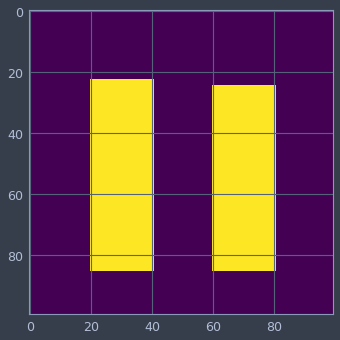

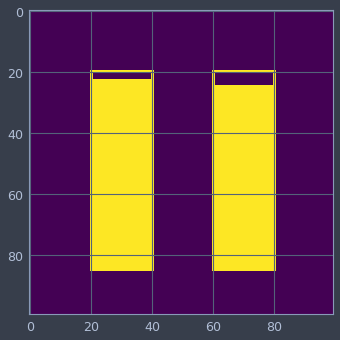

In [25]:
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])
plt.figure()
imshow(framed_images[INDEX])

In [77]:
stacked_images = np.stack((images,)*3, -1)

In [128]:
stacked_framed_images = np.stack((framed_images,)*3, -1)

In [75]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical

  
MLP = models.Sequential()
MLP.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 512))
MLP.add(layers.Dropout(0.5))
MLP.add(layers.Dense(2, activation='softmax'))

MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [141]:
MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1179904   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
Total params: 1,180,418
Trainable params: 1,180,418
Non-trainable params: 0
_________________________________________________________________


# First Experiment without Frames

In [78]:
X_train = stacked_images[0:500]
y_train = labels[0:500]
X_test = stacked_images[-500:]
y_test = labels[-500:]

In [81]:
features_train = vgg19_model.predict(X_train, verbose=True)

500/500 [==============================] - 44s 89ms/step


In [82]:
features_test = vgg19_model.predict(X_test, verbose=True)

500/500 [==============================] - 44s 89ms/step


In [85]:
MLP.fit(features_train.reshape(500, 3*3*512), to_categorical(y_train))

Epoch 1/1
500/500 [==============================] - 0s 935us/step - loss: 0.9372 - acc: 0.5140


In [94]:
y_predict = MLP.predict(features_test.reshape(500, 3*3*512))

In [106]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
print classification_report(y_test, binarize(y_predict, threshold=.5)[:,1])

             precision    recall  f1-score   support

      False       1.00      0.09      0.17       244
       True       0.54      1.00      0.70       256

avg / total       0.76      0.56      0.44       500



In [129]:
pred_labels = binarize(y_predict, threshold=.5)[:,1]
pred_labelA = np.where(pred_labels == 0)
test_labelA = np.where(y_test == 0)
true_pos = np.intersect1d(pred_neg, test_neg)
print '# Label A', len(test_labelA[0])
print '# Predict Label A', len(pred_labelA[0])
print 'TP', true_pos, len(true_pos)

for t in true_pos:
#   plt.figure()
#   imshow(X_test[t, :,:,0])
  
  print datapoints[-500:][t]


# Label A 244
# Predict Label A 22
TP [ 30  74  79 108 137 151 214 257 270 291 357 361 365 380 382 425 450 458
 466 474 495 496] 22
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]


# Second Experiment with Frames

In [130]:
X_train = stacked_framed_images[0:500]
y_train = labels[0:500]
X_test = stacked_framed_images[-500:]
y_test = labels[-500:]

In [131]:
# reset VGG
vgg19_model = VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

In [132]:
features_train = vgg19_model.predict(X_train, verbose=True)

500/500 [==============================] - 44s 89ms/step


In [135]:
features_test = vgg19_model.predict(X_test, verbose=True)

500/500 [==============================] - 44s 89ms/step


In [133]:
# reset MLP
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical

  
MLP = models.Sequential()
MLP.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 512))
MLP.add(layers.Dropout(0.5))
MLP.add(layers.Dense(2, activation='softmax'))

MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [134]:
MLP.fit(features_train.reshape(500, 3*3*512), to_categorical(y_train))

Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 0.8742 - acc: 0.5460


In [136]:
y_predict = MLP.predict(features_test.reshape(500, 3*3*512))

In [137]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
print classification_report(y_test, binarize(y_predict, threshold=.5)[:,1])

             precision    recall  f1-score   support

      False       1.00      0.09      0.17       244
       True       0.54      1.00      0.70       256

avg / total       0.76      0.56      0.44       500



In [138]:
pred_labels = binarize(y_predict, threshold=.5)[:,1]
pred_labelA = np.where(pred_labels == 0)
test_labelA = np.where(y_test == 0)
true_pos = np.intersect1d(pred_neg, test_neg)
print '# Label A', len(test_labelA[0])
print '# Predict Label A', len(pred_labelA[0])
print 'TP', true_pos, len(true_pos)

for t in true_pos:
#   plt.figure()
#   imshow(X_test[t, :,:,0])
  
  print datapoints[-500:][t]


# Label A 244
# Predict Label A 22
TP [ 30  74  79 108 137 151 214 257 270 291 357 361 365 380 382 425 450 458
 466 474 495 496] 22
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]
[20, 20, 20, 64, 60, 20, 20, 60]


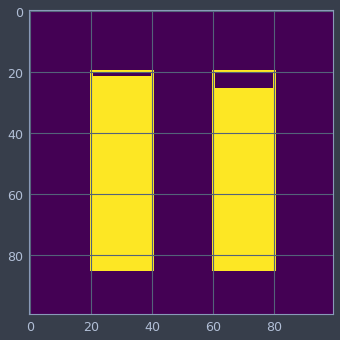

In [139]:
imshow(X_test[30,:,:,0])